### Importing Libraries

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Datasets

In [193]:
df_adapt = pd.read_csv('../../../Datasets/RQ2/vue/vue_adaptable_issues.csv')
df_consis = pd.read_csv('../../../Datasets/RQ2/vue/vue_consistent_issues.csv')
df_intention = pd.read_csv('../../../Datasets/RQ2/vue/vue_intentional_issues.csv')

In [194]:
print(df_adapt.columns)
print(f'---------------------')
print(df_consis.columns)
print(f'---------------------')
print(df_intention.columns)

Index(['version', 'date', 'timestamp', 'security_issues_low',
       'reliability_issues_low', 'maintainability_issues_low',
       'total_debt_low', 'security_issues_medium', 'reliability_issues_medium',
       'maintainability_issues_medium', 'total_debt_medium',
       'security_issues_high', 'reliability_issues_high',
       'maintainability_issues_high', 'total_debt_high'],
      dtype='object')
---------------------
Index(['version', 'date', 'timestamp', 'security_issues_low',
       'reliability_issues_low', 'maintainability_issues_low',
       'total_debt_low', 'security_issues_medium', 'reliability_issues_medium',
       'maintainability_issues_medium', 'total_debt_medium',
       'security_issues_high', 'reliability_issues_high',
       'maintainability_issues_high', 'total_debt_high'],
      dtype='object')
---------------------
Index(['version', 'date', 'timestamp', 'security_issues_low',
       'reliability_issues_low', 'maintainability_issues_low',
       'total_debt_low'

### Dropping unnecessary columns

In [195]:
columns_to_drop = ['security_issues_low', 'reliability_issues_low', 'maintainability_issues_low', 'security_issues_medium', 'reliability_issues_medium', 'maintainability_issues_medium', 'security_issues_high', 'reliability_issues_high', 'maintainability_issues_high']

In [196]:
df_adapt = df_adapt.drop(columns_to_drop, axis=1)
df_consis = df_consis.drop(columns_to_drop, axis=1)
df_intention = df_intention.drop(columns_to_drop, axis=1)

In [197]:
reamining_columns = df_adapt.columns
print(reamining_columns)

Index(['version', 'date', 'timestamp', 'total_debt_low', 'total_debt_medium',
       'total_debt_high'],
      dtype='object')


### Finding the 'Total debt' value for each row

In [198]:
def totalSumOfDebt(df, column_name):
    column_name = column_name + '_total_debt'
    df[column_name] = df[['total_debt_low', 'total_debt_medium', 'total_debt_high']].sum(axis=1)
    return df

In [199]:
df_adapt = totalSumOfDebt(df_adapt, 'adaptability')
df_consis = totalSumOfDebt(df_consis, 'consistency')
df_intention = totalSumOfDebt(df_intention, 'intentionality')

### Finding the cumulative difference of 'Total debt' from version to version

In [200]:
def debtDiff(df, column_name):
    new_column_name = column_name + '_total_debt_difference_with_previous_version'
    df[new_column_name] = df[column_name + '_total_debt'].diff()
    df[new_column_name].iloc[0] = df[column_name + '_total_debt'].iloc[0]
    return df

In [201]:
df_adapt = debtDiff(df_adapt, 'adaptability')
df_consis = debtDiff(df_consis, 'consistency')
df_intention = debtDiff(df_intention, 'intentionality')

C:\Users\sadik\AppData\Local\Temp\ipykernel_19464\3351027884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name].iloc[0] = df[column_name + '_total_debt'].iloc[0]
C:\Users\sadik\AppData\Local\Temp\ipykernel_19464\3351027884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name].iloc[0] = df[column_name + '_total_debt'].iloc[0]
C:\Users\sadik\AppData\Local\Temp\ipykernel_19464\3351027884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

### Renaming the columns

In [202]:
def renameColumns(df, column_names, prefix):
    for column_name in column_names:
        df = df.rename(columns={column_name : prefix + '_' + column_name})
    return df

In [203]:
columns_to_rename = ['total_debt_low', 'total_debt_medium', 'total_debt_high']

In [204]:
df_adapt = renameColumns(df_adapt, columns_to_rename, 'adaptability')
df_consis = renameColumns(df_consis, columns_to_rename, 'consistency')
df_intention = renameColumns(df_intention, columns_to_rename, 'intentionality')

### Sum of differences 

In [209]:
def sumOfDiff(df, column_name):
    df_sum_of_diff = df[column_name].iloc[1:].sum()
    return df_sum_of_diff

In [210]:
df_adapt_sum = sumOfDiff(df_adapt, 'adaptability_total_debt_difference_with_previous_version')
df_consis_sum = sumOfDiff(df_consis, 'consistency_total_debt_difference_with_previous_version')
df_intention_sum = sumOfDiff(df_intention, 'intentionality_total_debt_difference_with_previous_version')

In [212]:
print(df_adapt_sum)
print(df_consis_sum)
print(df_intention_sum)

14972.0
-46.0
4.0


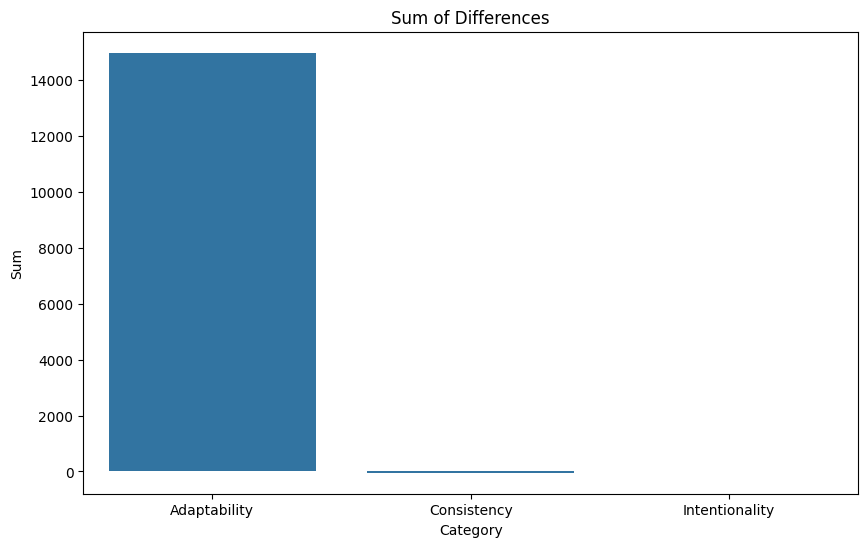

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the sums
df_sums = pd.DataFrame({
    'Category': ['Adaptability', 'Consistency', 'Intentionality'],
    'Sum': [df_adapt_sum, df_consis_sum, df_intention_sum]
})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sum', data=df_sums)
plt.title('Sum of Differences')
plt.show()

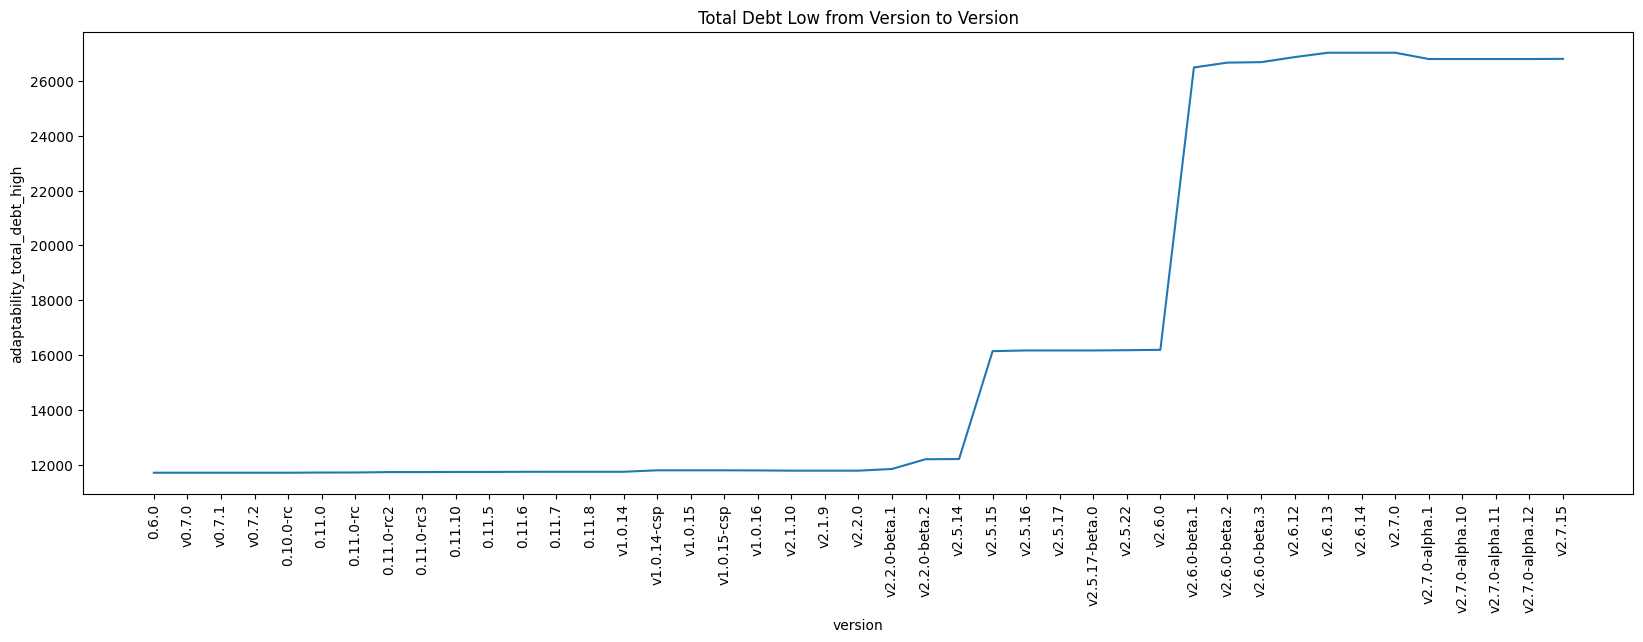

In [218]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='version', y='adaptability_total_debt_high', data=df_adapt)
plt.title('Total Debt Low from Version to Version')
plt.xticks(rotation='vertical')
plt.show()